In [310]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [311]:
data = pd.read_csv("train.csv")
X_test = pd.read_csv("test.csv")

In [312]:
data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


### 1. Feature Classification: Categorical & Numerical

#### Categorical variable:
- HomePlanet, CryoSleep, Destination, VIP, deck, num, side

#### Numerical variable:
- Age, RoomService, FoodCourt, ShoppingMall, Spa, VRDeck


In [313]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [314]:
data[['deck','num','side']] = data['Cabin'].str.split('/',expand = True)
X_test[['deck','num','side']] = X_test['Cabin'].str.split('/',expand = True)
data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,deck,num,side
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,0,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,0,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,0,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,1,S


#### RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
--> combine into "Bill" feature

#### After split feature into Cabin 
--> delete "Cabin" feature

#### "Name' feature don't relate Tranported
--> delete "Name" feature

In [315]:
drop_features = ['Cabin','Name']
data = data.drop(drop_features, axis = 1)
X_test = X_test.drop(drop_features, axis = 1)
data.head();

### 2. Exploratory Data Analysis (EDA)
- Correlating feature

#### HomePlanet

#### Insights
- Most passengers are from Earth

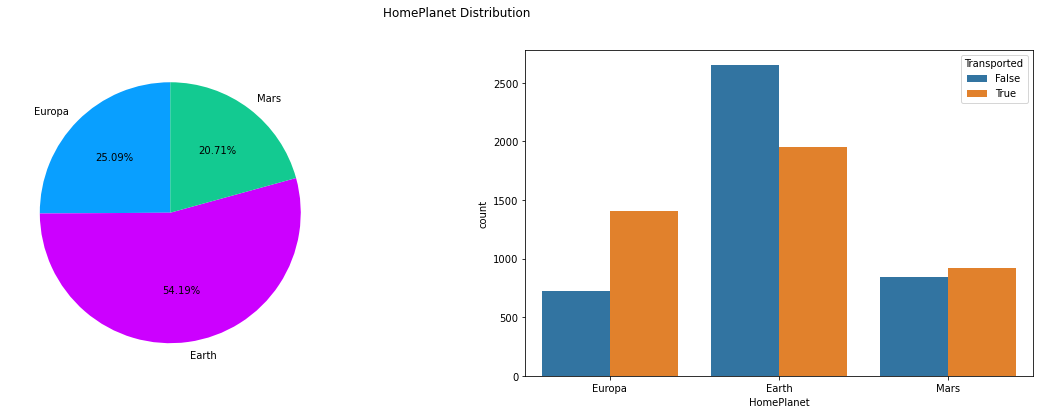

In [316]:
fig, ax = plt.subplots(1, 2, figsize=(20,6))
fig.suptitle('HomePlanet Distribution')
sizes = list(data['HomePlanet'].value_counts(sort = False))
labels = data['HomePlanet'].dropna().unique()
colors = ['#099FFF', '#CC00FF', '#13CA91']
ax[0].pie(sizes, colors=colors, startangle=90, labels=labels, autopct='%1.2f%%')
sns.countplot(x='HomePlanet', data=data, hue='Transported');


#### CryopSleep

#### Insights
- ratio False/ True ~ 2
- When CrypSleep False --> False/ True (Transported) ~ 2
- When CrypSleep True --> True/ False (Transported) ~ 4

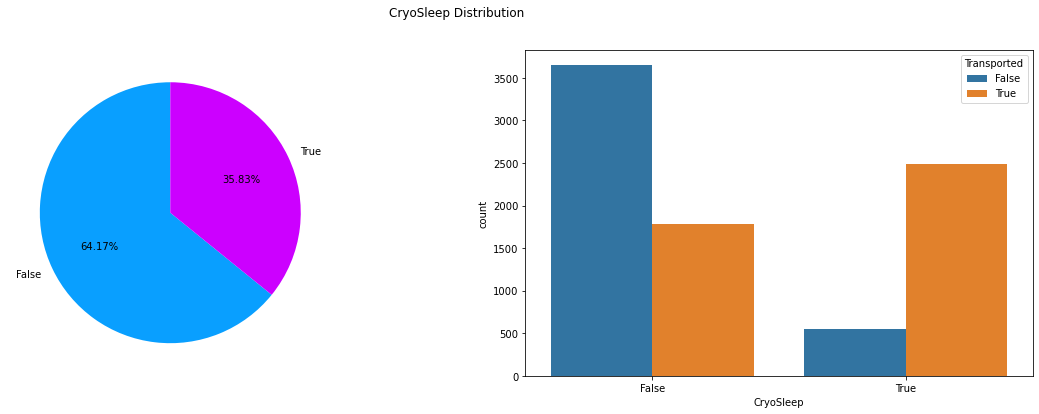

In [317]:
fig, ax = plt.subplots(1, 2, figsize=(20,6))
fig.suptitle('CryoSleep Distribution')
sizes = list(data['CryoSleep'].value_counts(sort = False))
labels = data['CryoSleep'].dropna().unique()
colors = ['#099FFF', '#CC00FF', '#13CA91']
ax[0].pie(sizes, colors=colors, startangle=90, labels=labels, autopct='%1.2f%%')
sns.countplot(x='CryoSleep', data=data, hue='Transported');

#### Destination

#### Insights
- The most Destination is TRAPPIST -1e (~70%)

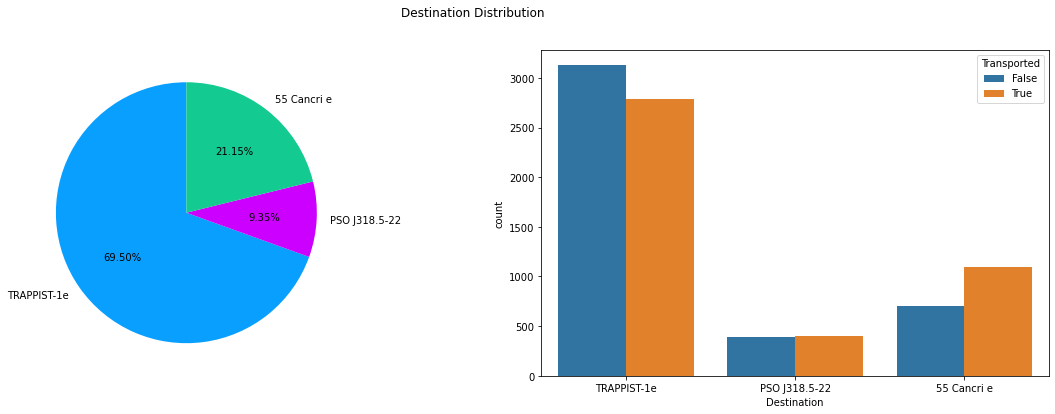

In [318]:
fig, ax = plt.subplots(1, 2, figsize=(20,6))
fig.suptitle('Destination Distribution')
sizes = list(data['Destination'].value_counts(sort = False))
labels = data['Destination'].dropna().unique()
colors = ['#099FFF', '#CC00FF', '#13CA91']
ax[0].pie(sizes, colors=colors, startangle=90, labels=labels, autopct='%1.2f%%')
sns.countplot(x='Destination', data=data, hue='Transported');

#### VIP

#### Insights
- Almost passengers not VIP (~98%)
- Ratio Tranported of VIP/ Not VIP is same

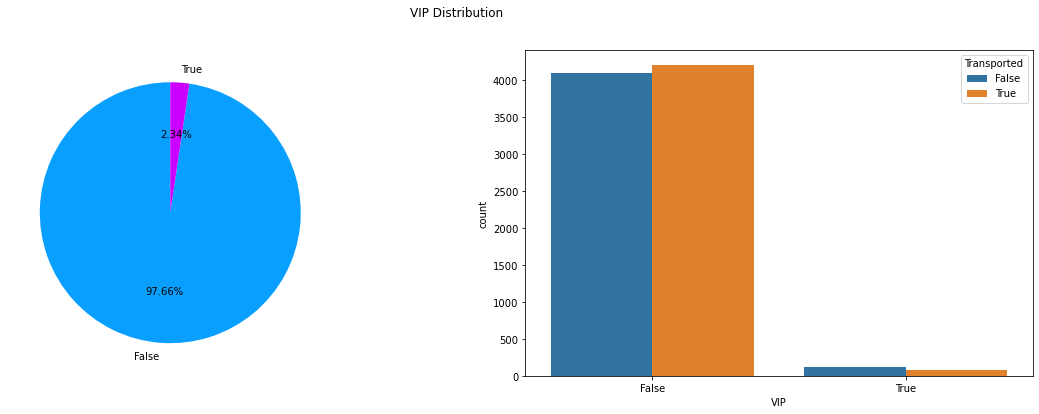

In [319]:
fig, ax = plt.subplots(1, 2, figsize=(20,6))
fig.suptitle('VIP Distribution')
sizes = list(data['VIP'].value_counts(sort = False))
labels = data['VIP'].dropna().unique()
colors = ['#099FFF', '#CC00FF', '#13CA91']
ax[0].pie(sizes, colors=colors, startangle=90, labels=labels, autopct='%1.2f%%')
sns.countplot(x='VIP', data=data, hue='Transported');

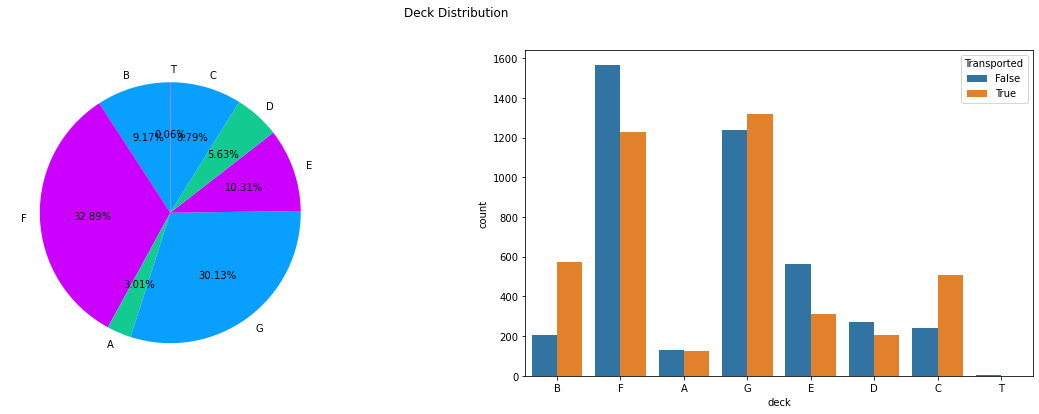

In [320]:
fig, ax = plt.subplots(1, 2, figsize=(20,6))
fig.suptitle('Deck Distribution')
sizes = list(data['deck'].value_counts(sort = False))
labels = data['deck'].dropna().unique()
colors = ['#099FFF', '#CC00FF', '#13CA91']
ax[0].pie(sizes, colors=colors, startangle=90, labels=labels, autopct='%1.2f%%')
sns.countplot(x='deck', data=data, hue='Transported');

#### Side
#### Insights
- Ratio P vs S nearly equal
- Ratio Tranported same 

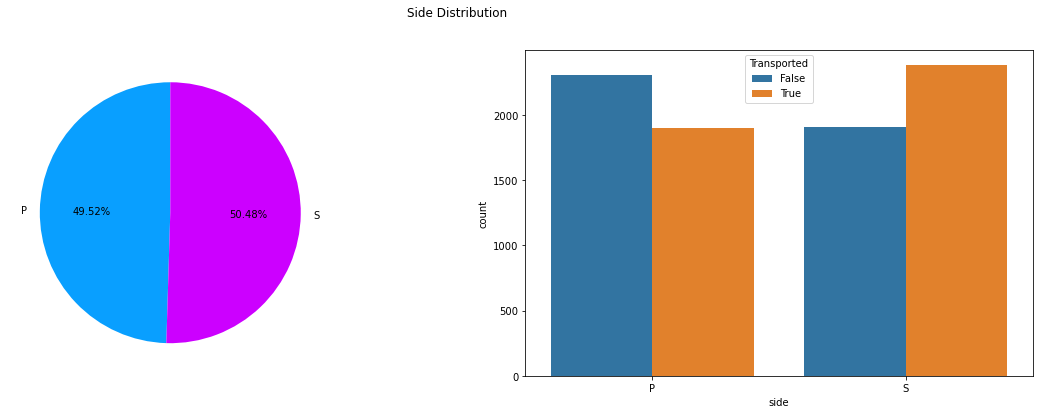

In [321]:
fig, ax = plt.subplots(1, 2, figsize=(20,6))
fig.suptitle('Side Distribution')
sizes = list(data['side'].value_counts(sort = False))
labels = data['side'].dropna().unique()
colors = ['#099FFF', '#CC00FF', '#13CA91']
ax[0].pie(sizes, colors=colors, startangle=90, labels=labels, autopct='%1.2f%%')
sns.countplot(x='side', data=data, hue='Transported');

#### Age

#### Insights
- <20 have more chance

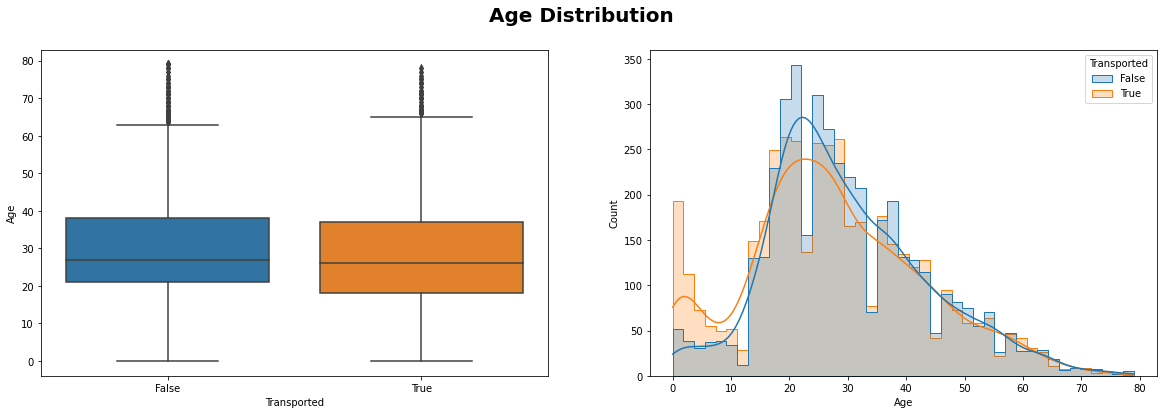

In [322]:
fig, ax = plt.subplots(1, 2, figsize=(20,6))
fig.suptitle('Age Distribution', size = 20, weight='bold')

sns.boxplot(x='Transported', y='Age', data=data, ax=ax[0])
sns.histplot(x='Age', element="step", kde=True, data= data, hue='Transported');


In [323]:
y = data['Transported']
X = data.drop('Transported', axis = 1)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Destination   8511 non-null   object 
 4   Age           8514 non-null   float64
 5   VIP           8490 non-null   object 
 6   RoomService   8512 non-null   float64
 7   FoodCourt     8510 non-null   float64
 8   ShoppingMall  8485 non-null   float64
 9   Spa           8510 non-null   float64
 10  VRDeck        8505 non-null   float64
 11  deck          8494 non-null   object 
 12  num           8494 non-null   object 
 13  side          8494 non-null   object 
dtypes: float64(6), object(8)
memory usage: 950.9+ KB


In [324]:
X.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,deck,num,side
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,B,0,P
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,F,0,S
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,A,0,S
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,A,0,S
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,F,1,S


In [325]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

scale = StandardScaler()
label = LabelEncoder()

num_col = [col for col in X.columns if X[col].dtype == 'float64']
cat_col = [col for col in X.columns if X[col].dtype == 'object' and col != 'PassengerId' and X[col].nunique() < 10]
print(*cat_col)
X[num_col] = scale.fit_transform(X[num_col])

for col in cat_col:
    X[col] = label.fit_transform(X[col])


HomePlanet CryoSleep Destination VIP deck side


In [326]:
X.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,deck,num,side
0,0001_01,1,0,2,0.702095,0,-0.337025,-0.284274,-0.287317,-0.273736,-0.266098,1,0,0
1,0002_01,0,0,2,-0.333233,0,-0.173528,-0.278689,-0.245971,0.209267,-0.227692,5,0,1
2,0003_01,1,0,2,2.013510,1,-0.272527,1.934922,-0.287317,5.634034,-0.223327,0,0,1
3,0003_02,1,0,2,0.287964,0,-0.337025,0.511931,0.326250,2.655075,-0.097634,0,0,1
4,0004_01,0,0,2,-0.885407,0,0.117466,-0.240833,-0.037590,0.223344,-0.264352,5,1,1


In [327]:
X_test[num_col] = scale.fit_transform(X_test[num_col])
for col in cat_col:
    X_test[col] = label.fit_transform(X_test[col])
X_test.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,deck,num,side
0,0013_01,0,1,2,-0.116957,0,-0.361266,-0.287719,-0.316173,-0.271297,-0.249197,6,3,1
1,0018_01,0,0,2,-0.681236,0,-0.361266,-0.281826,-0.316173,2.255891,-0.249197,5,4,1
2,0019_01,1,1,0,0.165182,0,-0.361266,-0.287719,-0.316173,-0.271297,-0.249197,2,0,1
3,0021_01,1,0,2,0.658927,0,-0.361266,4.067167,-0.316173,-0.109263,0.219987,2,1,1
4,0023_01,0,0,2,-0.610702,0,-0.344790,-0.287719,0.816230,-0.271297,-0.249197,5,5,1


In [328]:
X = X.fillna(0)
X_test = X_test.fillna(0)
pId = X['PassengerId']
X = X.drop('PassengerId', axis = 1)
pId_test = X_test['PassengerId']
X_test = X_test.drop('PassengerId', axis = 1)

In [329]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size= 0.8, test_size= 0.2, random_state=0)

In [330]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)


C:\Users\Talking not enough\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [331]:
score = lr.score(X_val, y_val)
score

0.7757331799884991

In [334]:
pred = lr.predict(X_test)
print(pred)

[ True False  True ...  True  True  True]


In [333]:
output = pd.DataFrame({'PassengerId': pId_test,
                       'Transported': pred})
output.to_csv('submission_1.csv', index=False)

- Data processing (impute, onehot)
- Dùng Heatmap ktra độ tương quan giữa các trường dữ liêu --> loại bỏ dữ liệu ít liên quan
- Model